# Reach for the Stars: Are Fandango's Rates Still Inflated?


## Contents

## Introduction

In a 2015 article, journalist Walt Hickey found that stars rating on [Fandango](https://www.fandango.com/)'s website were inflated. By looking at the site's HTML code he learned that the stars rating were almost always rounded up to the nearest half star, and sometimes to the nearest whole star.

Fandango has replied that this was caused by a bug, and promised to fix it. In this project we'll analyze recent movie ratings to try to determine if that issue has indeed been fixed, and the ratings displayed to the site's visitors are no longer inflated.

## The Results

## The Data

* Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis

In [2]:
# Boilerplate code that loads the libraries and data
import pandas as pd
import numpy as np
original_comparison = pd.read_csv("fandango_score_comparison.csv")
recent_ratings = pd.read_csv("movie_ratings_16_17.csv")

# Allow Jupyter notebook to generate plots
import matplotlib.pyplot as plt
%matplotlib inline

### Exploring the Original Comparison

In [3]:
# Some information about the dataset
original_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
# Extract the relevant data into a separate dataset
Fandango_data_original = original_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()


### Exploring the Recent Dataset

In [5]:
# Some information about the dataset
recent_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


It looks like the relevant data in this case would be the film's name, its release year and its score on Fandango

In [6]:
# Extract the relevant data into a separate dataset

Fandango_data_recent = recent_ratings[['movie', 'year', 'fandango']].copy()

## Defining the Population

Our goal is to determine whether has been any change in Fandango's rating system after Hickey's analysis. Therefore, our population would be Fandango's entire film rating scores, before and after the analysis was published.

From reading each repository's READEM.md file, we learn that neither of them has data for the entire population, and both are samples.

However, both samples aren't realy representative, as the selection process for both only only looked at popular films ("at least 30 fan reviews on Fandango" for Hailey's sample, and "a significant number of votes" on the one taken by the Dataquest team). So we may have to do some adjustments if we want to work with these repositories.

## Changing the Goal of our Analysis

Instead of getting new, more representative samples, a simpler approach would be to change the goal of our analysis.
We can redefine our population - rather than looking at all the movies in Fandango's database, let's look only at the most popular ones. So our new goal is to check if there's any difference between Fandango's ratings of popular films between the years 2015 and 2016.

## Isolating the Samples We need

With our new goal, we now have two populations we want to isolate and work with:
* All Fandango's ratings for popular movies released in 2015
* All Fandango's ratings for popular movies released in 2016 

Since the term 'Popular' isn't well-defined we'd need to define it before moving forward. For simplicity, we'll use Hickey's definition - a movie is considered "Popular" if it has at least 30 user reviews on Fandango.

We'd like to check that these samples are representative - i.e., all movies in each sample have over 30 fan ratings - but we have a problem - the more recent sample doesn't have the number of votes each film has. 
The ideal approach would be to sample our sample - take 10 random films from the repository and check the number of reviews each one of them got on Fandango. If at least 8 (80%) of them have above 30 reviews we can determine this is a representative sample - however, Fandango has made some changes to their site and no longer display the number of votes a film received.
So, to carry on with the project we're going to make an educated guess, and assume that the recent sample is representative, since according to its README file, it "contains movie ratings data for 214 of the most **popular** movies..."

Before moving on to the next step we want to make sure that each dataset holds only the relevant data.
Since we're interested in films made in the years 2015-2016, let's filter out films released outside of those years.

Starting with Hickey's dataset, there's no column dedicated to a film's release year or release date. 
however, if we look at the `FILM` column:

In [7]:
Fandango_data_original.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


We can see that each film's release year appears in brackets after the film's name.

Let's extract that information into a separate column:

In [8]:
Fandango_data_original['YEAR'] = Fandango_data_original['FILM'].str[-5:-1]
Fandango_data_original.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,YEAR
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Excellent. Now we can isolate only films created in 2015:

In [9]:
Fandango_data_original_2015 = Fandango_data_original[Fandango_data_original['YEAR'] == '2015']

In [10]:
Fandango_data_original_2015['YEAR'].value_counts()

2015    129
Name: YEAR, dtype: int64

Now, let's do the same for the most recent dataset, only for the year 2016.
Luckily, that datast already has the release year in a separate colum, so filtering is very simple:

In [11]:
Fandango_data_recent_2016 = Fandango_data_recent[Fandango_data_recent['year'] == 2016]
Fandango_data_recent_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Now that we have isolated the data for each year we can analyze them.

We want to compare their distributions and see if there's any difference between the way Fandango rated movies in 2015 and the one in 2016, so let's make a high-level comparison between the shapes of the distributions.

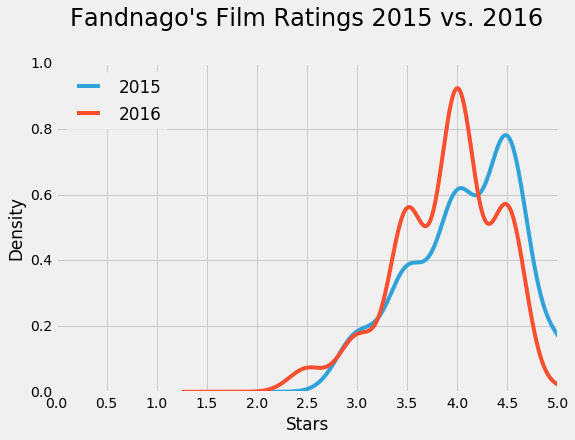

In [12]:
plt.style.use('fivethirtyeight')
xticks=np.arange(0, 5.1, 0.5)
Fandango_data_original_2015['Fandango_Stars'].plot.kde(xticks=xticks, xlim=(0, 5), label='2015', figsize = (8,5.5))
Fandango_data_recent_2016['fandango'].plot.kde(label='2016')
plt.title("Fandnago's Film Ratings 2015 vs. 2016", fontsize=24, y=1.1)
plt.xlabel("Stars")
plt.legend(loc = 'upper left')
plt.show()

From the graph above we can see that 2015's ratings have a strong skew to the left, meaning most of its revies are in the higher number of stars.
The 2016 ratings are more symmetrical, and slightly shifted with a peak at 4 stars.

This analysis does auggest that there's been a change in Fandango's ratings for popular films between 2015 and 2016, with the 2016 ratings being slightly lower than the 2015 ones, perhaps due to Hickey's article.

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.
To do that we'll look at the frequency idstribution tables ot the two distributions:

In [25]:
print('2015')
print('-'*16)
print(Fandango_data_original_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [27]:
print('2016')
print('-'*16)
print(Fandango_data_recent_2016['fandango'].value_counts(normalize=True).sort_index() * 100)

2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


To account for the varying number of films in each repository, we've normalized both tables.
The data clearly shows that the 2015 ratings are generally higher than those from 2016.

In 2015, nearly 45% of films received either 4.5 or 5 stars, compared to only 25.13% in 2016.
While no film in 2015 received a rating below 3 stars, 3.14% of films in 2016 were given 2.5 stars.
At the top end of the scale, almost 7% of films in 2015 received a perfect 5-star review, whereas only 0.52% achieved this in 2016 – a more than tenfold decrease.



## Determining the Direction of the Change

To get a clearer undersanding of the direction and value of the change we'll take a couple of summary statistics - we'll take each distribution of movie ratings and compute its mean, median and mode, then compare them to determine what they tell about the difference.

In [34]:
stars_2015 = Fandango_data_original_2015['Fandango_Stars']
statistics_2015 = [stars_2015.mean(), stars_2015.median(), stars_2015.mode()[0]]
stars_2016 = Fandango_data_recent_2016['fandango']
statistics_2016 = [stars_2016.mean(), stars_2016.median(), stars_2016.mode()[0]]

summary = pd.DataFrame()
summary['2015'] = statistics_2015
summary['2016'] = statistics_2016

summary.index = ['Mean', 'Median', 'Mode']
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


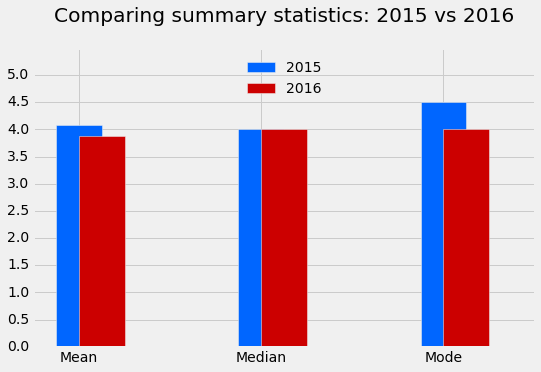

In [59]:
summary['2015'].plot.bar(color='#0066FF', align='center', ylim=(0.0, 5.5), figsize=(8, 5), width=0.25, yticks=np.arange(0.0, 5.1, 0.5))
summary['2016'].plot.bar(color='#CC0000', align='edge', width=0.25, rot=0)
plt.legend(loc="upper center", fontsize=14, framealpha=0)
plt.title("Comparing summary statistics: 2015 vs 2016", y = 1.07)
plt.show()

The graph and summary clearly show the direction of the change between the 2015 and 2016 ratings:
While the median stayed at 4.0, the mean rating dropped by about 0.2 stars (a 5% drop).
Combining that with the drop in the mode (4.5 -> 4.0) we can confirm that on average, popular films released in 2016 got a lower star rating in Fandango than those released in 2015, by about 5%.

## Conclusion

This analysis shows that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

The source of this change can't be determined from the data we have. While there's a correlation between the drop and the publishing of Hickey's article, there can be other causes. There may be a global trend towards lower ratings. We may want to compare ratings given on other sites between those years, and see if the change we saw is unique to Fandango.